<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ETH.csv')
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1822,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1823,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1824,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   ETH-USD_ADJCLOSE  1629 non-null   float64
 2   ETH-USD_CLOSE     1629 non-null   float64
 3   ETH-USD_HIGH      1629 non-null   float64
 4   ETH-USD_LOW       1629 non-null   float64
 5   ETH-USD_OPEN      1629 non-null   float64
 6   ETH-USD_VOLUME    1629 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ETH-USD_ADJCLOSE,197
ETH-USD_CLOSE,197
ETH-USD_HIGH,197
ETH-USD_LOW,197
ETH-USD_OPEN,197
ETH-USD_VOLUME,197


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ETH-USD_ADJCLOSE,1629.0,1.068500e+03,1.254817e+03,8.430830e+01,1.973175e+02,3.938883e+02,1.806972e+03,4.812087e+03
ETH-USD_CLOSE,1629.0,1.068500e+03,1.254817e+03,8.430830e+01,1.973175e+02,3.938883e+02,1.806972e+03,4.812087e+03
ETH-USD_HIGH,1629.0,1.102866e+03,1.293636e+03,8.534274e+01,2.035005e+02,4.063040e+02,1.843819e+03,4.891705e+03
ETH-USD_LOW,1629.0,1.027068e+03,1.209969e+03,8.282989e+01,1.932590e+02,3.812953e+02,1.729642e+03,4.718039e+03
ETH-USD_OPEN,1629.0,1.067100e+03,1.254566e+03,8.427969e+01,1.975370e+02,3.916790e+02,1.804677e+03,4.810071e+03
ETH-USD_VOLUME,1629.0,1.252477e+10,1.114217e+10,6.217330e+08,3.298281e+09,9.766632e+09,1.776813e+10,8.448291e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
517,2018-09-25,218.505005,218.505005,228.326996,206.490005,228.326996,2.120360e+09
543,2018-10-21,205.141998,205.141998,208.154999,204.621002,205.389999,1.190300e+09
215,2017-11-27,480.355011,480.355011,493.404999,468.484985,471.531006,1.396480e+09
797,2019-07-02,291.596436,291.596436,295.655853,272.602570,293.537262,1.061841e+10
353,2018-04-14,501.477997,501.477997,512.023987,488.278992,492.579987,1.519080e+09
1279,2020-10-26,393.888306,393.888306,411.279877,383.782898,406.217987,1.515568e+10
1106,2020-05-06,204.055786,204.055786,211.534622,204.040878,206.481354,2.034354e+10
1440,2021-04-05,2107.887207,2107.887207,2140.985352,2032.387695,2093.260742,2.888939e+10
61,2017-06-26,NaN,NaN,NaN,NaN,NaN,NaN
1395,2021-02-19,1960.164795,1960.164795,1969.546997,1896.684448,1938.859863,2.626881e+10


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
193,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
194,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09
...,...,...,...,...,...,...,...
1624,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1625,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1626,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1627,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09
...,...,...,...,...,...,...,...
1624,2022-04-21,2987.480713,2987.480713,3173.451416,2962.410400,3077.829346,2.078359e+10
1625,2022-04-22,2964.835693,2964.835693,3024.854492,2942.358643,2986.938721,1.678280e+10
1626,2022-04-23,2938.114014,2938.114014,2975.322754,2926.740234,2964.802246,9.116956e+09
1627,2022-04-24,2922.732666,2922.732666,2961.882080,2922.128662,2937.347168,9.696830e+09


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[3]])*100
df.head()

,Date,ETH-USD_ADJCLOSE,ETH-USD_CLOSE,ETH-USD_HIGH,ETH-USD_LOW,ETH-USD_OPEN,ETH-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,320.884003,320.884003,329.451996,307.056000,308.644989,8.932500e+08,3.814155,6.797954
1,2017-11-10,299.252991,299.252991,324.717987,294.541992,320.670990,8.859860e+08,7.157155,9.292985
2,2017-11-11,314.681000,314.681000,319.453003,298.191986,298.585999,8.423010e+08,5.114704,6.655444
3,2017-11-12,307.907990,307.907990,319.153015,298.513000,314.690002,1.613480e+09,2.202610,6.467122
4,2017-11-13,316.716003,316.716003,328.415009,307.024994,307.024994,1.041890e+09,3.059842,6.513105


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')

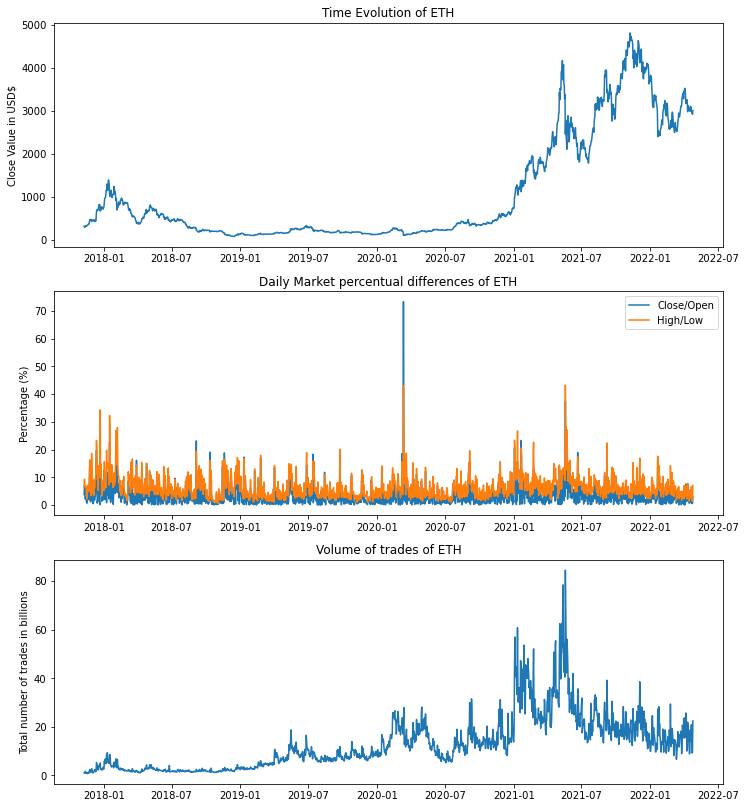

In [13]:
plot_coinValue(df)